# Visualize the manually constructed dataset of mining areas and ground truth masks

In [77]:
import geopandas as gpd
import leafmap
from shapely.ops import unary_union
from shapely.geometry import Point, mapping, box, shape
import shapely
import json
import os
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

os.getcwd()
root = os.path.dirname(os.getcwd())
root = root + "/mine-segmentation"
root

'/teamspace/studios/this_studio/workspaces/mine-segmentation'

In [8]:
raw_dataset = root + "/data/raw/mining_tiles_with_masks.gpkg"

post_dataset = root + "/data/processed/mining_tiles_with_masks_and_bounding_boxes.gpkg"

In [10]:
# Load the data
data = gpd.read_file(raw_dataset, layer="tiles")
print(data.shape)
data.head()

(10, 9)


,tile_id,s2_tile_id,source_dataset,preferred_dataset,minetype1,minetype2,comment,timestamp,geometry
0,2805,S2A_MSIL2A_20191017T004711_R102_T54LWM_2020100...,maus,maus,Surface,Industrial,,2024-07-04 10:04:22.755,"POLYGON ((141.8445 -12.50898, 141.84391 -12.32..."
1,1612,S2B_MSIL2A_20191007T061729_R034_T42UXD_2020100...,tang,tang,Surface,Industrial,,2024-07-04 10:05:26.560,"POLYGON ((72.06065 52.32091, 72.07342 52.50476..."
2,2352,S2B_MSIL2A_20190707T021609_R003_T50LMR_2020100...,both,tang,Surface,Industrial,,2024-07-04 10:06:29.655,"POLYGON ((117.00981 -9.0093, 117.00981 -8.8240..."
3,1167,S2A_MSIL2A_20190424T082611_R021_T33JYF_2020110...,both,tang,Surface,Industrial,,2024-07-04 10:07:19.452,"POLYGON ((18.02702 -31.33978, 18.02113 -31.155..."
4,1107,S2A_MSIL2A_20180827T101021_R022_T32SMD_2020102...,both,tang,Surface,Industrial,,2024-07-04 10:09:21.708,"POLYGON ((8.36212 34.32496, 8.36072 34.50964, ..."


In [4]:
# Create a Leaflet map
m = leafmap.Map()

# Add the GeoDataFrame to the map
m.add_gdf(data, layer_name="dataset")

# Display the map
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

## Visualize the global distribution of the tiles

In [8]:
# Using Markers on leafmap
def plot_tiles_on_basemap(gdf):
    import folium

    m = folium.Map()

    # Iterate over the tiles and add markers to the map
    for _, row in gdf.iterrows():
        lat = row.geometry.centroid.y
        lon = row.geometry.centroid.x
        folium.Marker([lat, lon]).add_to(m)

    # Display the map
    return m

plot_tiles_on_basemap(data)

# Load processed dataset

In [11]:
# list layernames 
gpd.list_layers(post_dataset)

,name,geometry_type
0,tiles,Polygon
1,maus_polygons,MultiPolygon
2,tang_polygons,MultiPolygon
3,maus_bboxes,MultiPolygon
4,tang_bboxes,MultiPolygon
5,preferred_polygons,MultiPolygon
6,preferred_bboxes,MultiPolygon


In [12]:
# load the processed dataset
tiles = gpd.read_file(post_dataset, layer="tiles")
maus_poly = gpd.read_file(post_dataset, layer="maus_polygons")
tang_poly = gpd.read_file(post_dataset, layer="tang_polygons")
preferred_poly = gpd.read_file(post_dataset, layer="preferred_polygons")
maus_bbox = gpd.read_file(post_dataset, layer="maus_bboxes")
tang_bbox = gpd.read_file(post_dataset, layer="tang_bboxes")
preferred_bbox = gpd.read_file(post_dataset, layer="preferred_bboxes")
tiles.head()

,tile_id,s2_tile_id,source_dataset,preferred_dataset,minetype1,minetype2,comment,timestamp,geometry
0,2805,S2A_MSIL2A_20191017T004711_R102_T54LWM_2020100...,maus,maus,Surface,Industrial,,2024-07-04 10:04:22.755,"POLYGON ((141.8445 -12.50898, 141.84391 -12.32..."
1,1612,S2B_MSIL2A_20191007T061729_R034_T42UXD_2020100...,tang,tang,Surface,Industrial,,2024-07-04 10:05:26.560,"POLYGON ((72.06065 52.32091, 72.07342 52.50476..."
2,2352,S2B_MSIL2A_20190707T021609_R003_T50LMR_2020100...,both,tang,Surface,Industrial,,2024-07-04 10:06:29.655,"POLYGON ((117.00981 -9.0093, 117.00981 -8.8240..."
3,1167,S2A_MSIL2A_20190424T082611_R021_T33JYF_2020110...,both,tang,Surface,Industrial,,2024-07-04 10:07:19.452,"POLYGON ((18.02702 -31.33978, 18.02113 -31.155..."
4,1107,S2A_MSIL2A_20180827T101021_R022_T32SMD_2020102...,both,tang,Surface,Industrial,,2024-07-04 10:09:21.708,"POLYGON ((8.36212 34.32496, 8.36072 34.50964, ..."


Construct one coherent dataset with the preferred mask

## Visualize the processed dataset

In [14]:
ROW = 6

m = leafmap.Map(center = (tiles.iloc[ROW:ROW+1].geometry.centroid.y.values[0], tiles.iloc[ROW:ROW+1].geometry.centroid.x.values[0]), zoom = 12)
# add satellite
m.add_basemap("SATELLITE")

style_tile = {
    "color": "orange",
    "fillColor": "orange",
    "fillOpacity": 0.0,
}

style_bbox = {
    "color": "green",
    "fillColor": "green",
    "fillOpacity": 0.0,
}

m.add_gdf(tiles.iloc[ROW:ROW+1], layer_name="tiles", style=style_tile)
m.add_gdf(preferred_poly.iloc[ROW:ROW+1], layer_name="masks")
m.add_gdf(preferred_bbox.iloc[ROW:ROW+1], layer_name="bboxes", style=style_bbox)
m

Map(center=[-32.24998637235755, 149.91666578859756], controls=(ZoomControl(options=['position', 'zoom_in_text'…

# Check the image masks and chips

In [68]:
file_index=10
chips_dir = "/data/processed/chips/train/chips"
files = os.listdir(root + chips_dir)
filename = root + chips_dir + "/" + files[file_index]

img = np.load(filename)
print(img.shape)
img

(3, 1024, 1024)


array([[[3296., 3466., 3594., ..., 2448., 2490., 2410.],
        [3254., 3252., 3374., ..., 2578., 2562., 2512.],
        [3182., 3200., 3232., ..., 2710., 2604., 2590.],
        ...,
        [3912., 3840., 3760., ..., 3902., 3984., 4000.],
        [3526., 3676., 3648., ..., 3920., 4034., 3938.],
        [2834., 3052., 3272., ..., 3940., 3986., 3970.]],

       [[2382., 2596., 2734., ..., 1794., 1838., 1786.],
        [2364., 2430., 2568., ..., 1902., 1892., 1842.],
        [2374., 2406., 2432., ..., 1996., 1914., 1914.],
        ...,
        [2808., 2774., 2766., ..., 2754., 2754., 2806.],
        [2700., 2768., 2702., ..., 2756., 2764., 2768.],
        [2072., 2294., 2396., ..., 2758., 2736., 2800.]],

       [[1564., 1724., 1928., ..., 1244., 1278., 1228.],
        [1550., 1550., 1696., ..., 1330., 1280., 1288.],
        [1530., 1562., 1600., ..., 1394., 1324., 1350.],
        ...,
        [1976., 1950., 1874., ..., 1772., 1842., 1854.],
        [1864., 1954., 1916., ..., 1786., 184

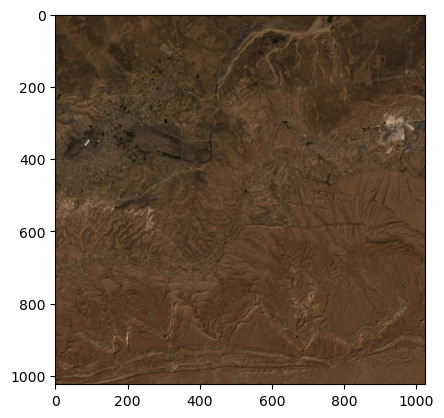

In [69]:
im2display = img.transpose((1,2,0))

# normalize and clip the image ranges
im2display = (im2display - im2display.min()) / (im2display.max() - im2display.min())
im2display = np.clip(im2display, 0, 1)

plt.imshow(im2display)

In [70]:
mask_filename = root + labels_dir + "/" + files[file_index].replace("_img", "_mask")

mask = np.load(mask_filename)
mask.shape

(1, 1024, 1024)

In [71]:
mask

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

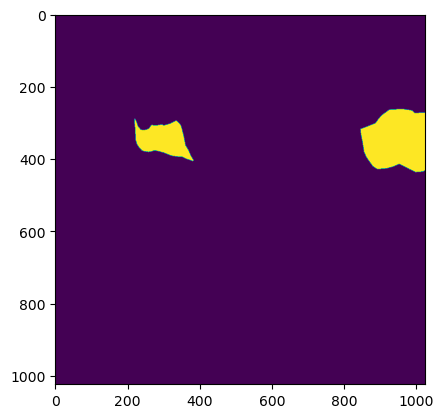

In [72]:
# drop the first dimension
mask = mask.squeeze()
plt.imshow(mask)

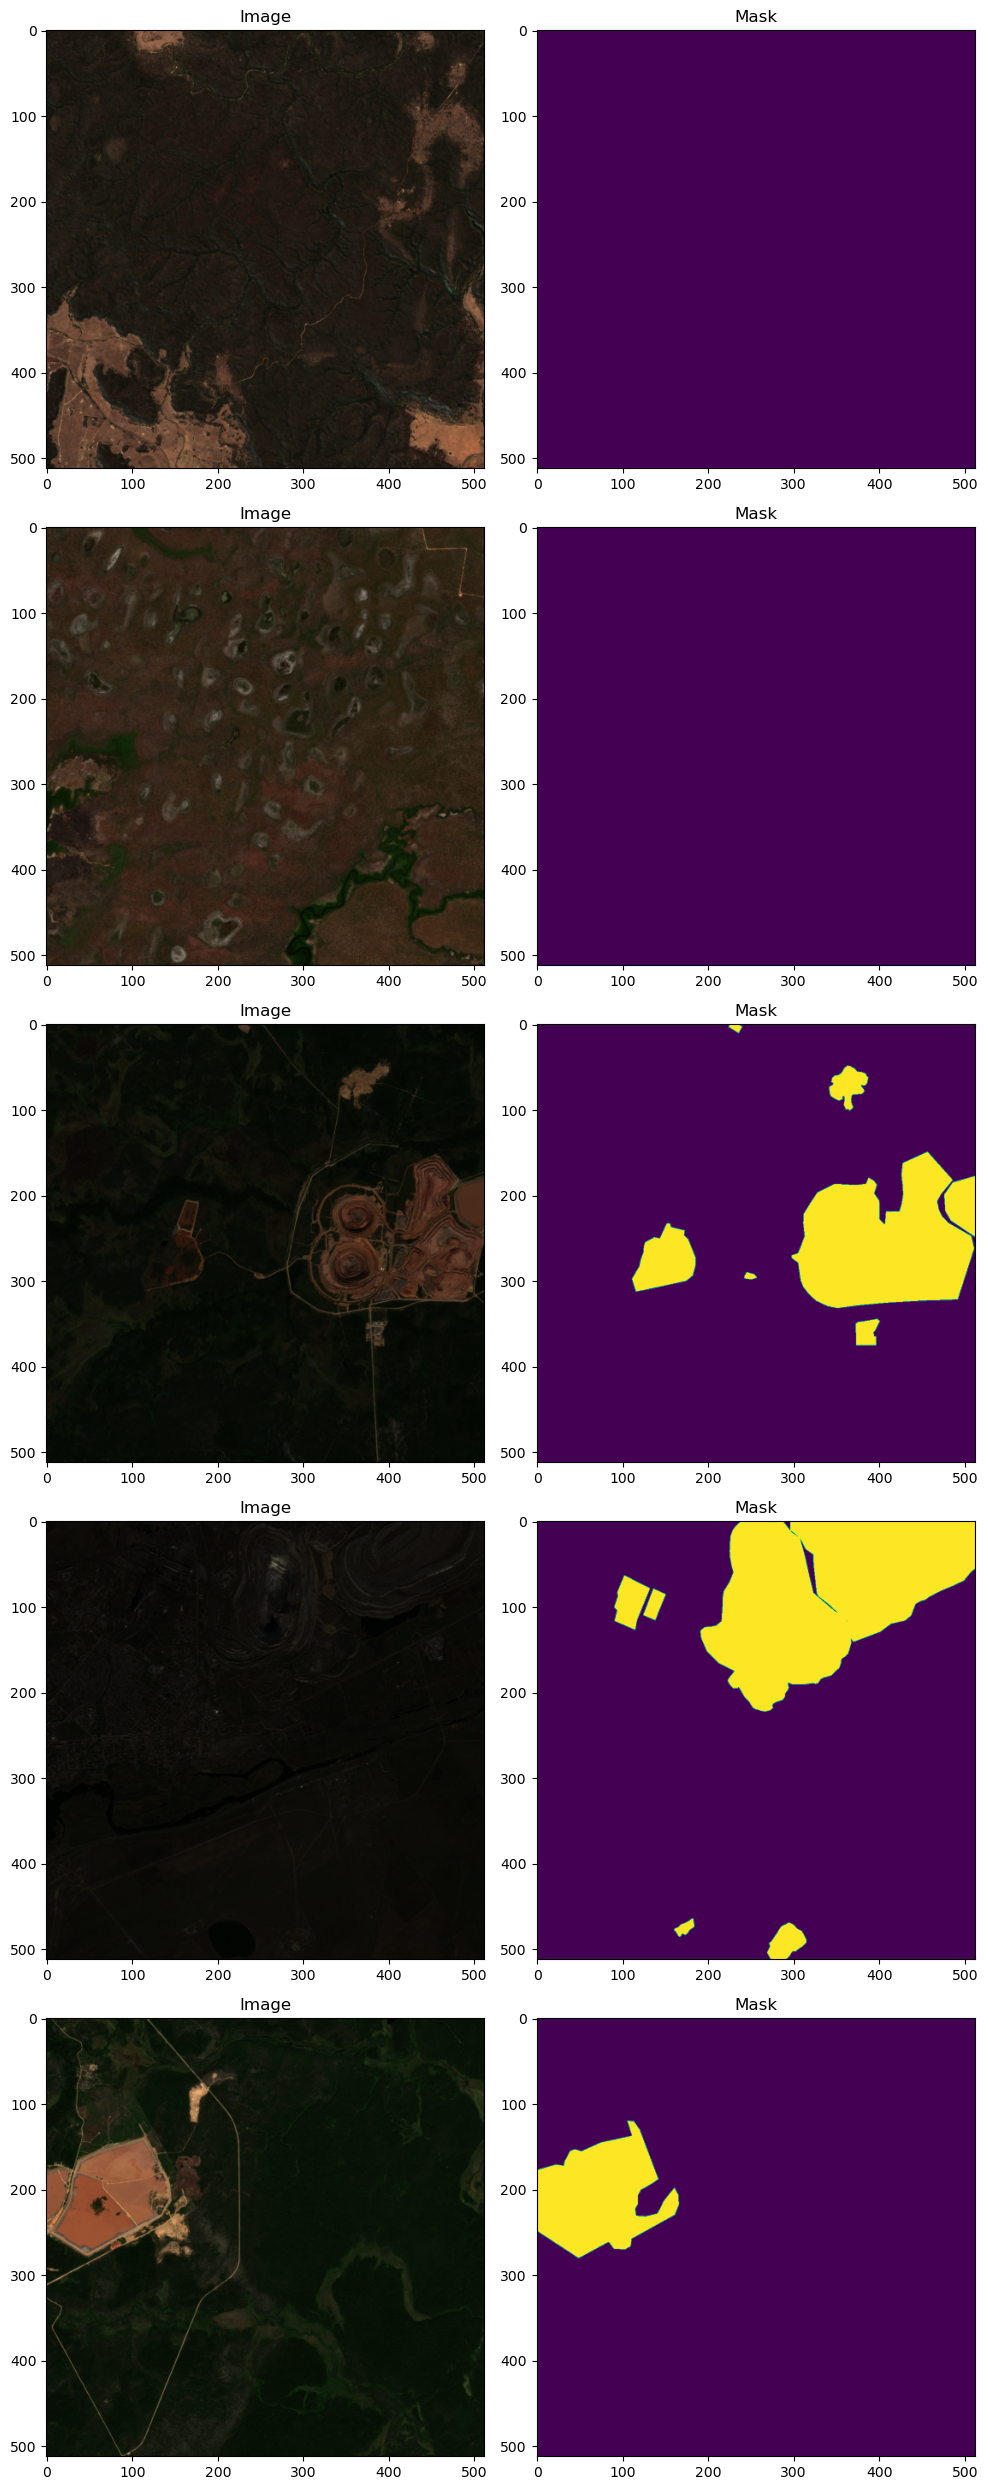

In [83]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

def plot_images_and_masks(root):
    chips_dir = root + "/data/processed/chips/train/chips"
    masks_dir = root + "/data/processed/chips/train/labels"

    files = os.listdir(chips_dir)
    
    fig, axs = plt.subplots(5, 2, figsize=(10, 25))
    
    for file_index in range(5):
        filename = os.path.join(chips_dir, files[file_index])
        img = np.load(filename)
        im2display = img.transpose((1, 2, 0))
        im2display = (im2display - im2display.min()) / (im2display.max() - im2display.min())
        im2display = np.clip(im2display, 0, 1)
        
        mask_filename = masks_dir + "/" + files[file_index].replace("_img", "_mask")
        mask = np.load(mask_filename).squeeze()
        
        resized_img = resize(im2display, (im2display.shape[0] // 2, im2display.shape[1] // 2))
        resized_mask = resize(mask, (mask.shape[0] // 2, mask.shape[1] // 2))
        
        axs[file_index, 0].imshow(resized_img)
        axs[file_index, 0].set_title("Image")
        
        axs[file_index, 1].imshow(resized_mask)
        axs[file_index, 1].set_title("Mask")
    
    plt.tight_layout()
    plt.show()

plot_images_and_masks(root)